In [1]:
import tensorflow as tf
import keras
import os
import cv2
import imghdr
import numpy as np
import matplotlib.pyplot as plt

In [6]:
image_exts=['jpeg','jpg','bmp','png']
data_dir=r"C:\potholess\images"
os.listdir(data_dir)

['potholes0.png',
 'potholes1.png',
 'potholes10.png',
 'potholes100.png',
 'potholes101.png',
 'potholes102.png',
 'potholes103.png',
 'potholes104.png',
 'potholes105.png',
 'potholes106.png',
 'potholes107.png',
 'potholes108.png',
 'potholes109.png',
 'potholes11.png',
 'potholes110.png',
 'potholes111.png',
 'potholes112.png',
 'potholes113.png',
 'potholes114.png',
 'potholes115.png',
 'potholes116.png',
 'potholes117.png',
 'potholes118.png',
 'potholes119.png',
 'potholes12.png',
 'potholes120.png',
 'potholes121.png',
 'potholes122.png',
 'potholes123.png',
 'potholes124.png',
 'potholes125.png',
 'potholes126.png',
 'potholes127.png',
 'potholes128.png',
 'potholes129.png',
 'potholes13.png',
 'potholes130.png',
 'potholes131.png',
 'potholes132.png',
 'potholes133.png',
 'potholes134.png',
 'potholes135.png',
 'potholes136.png',
 'potholes137.png',
 'potholes138.png',
 'potholes139.png',
 'potholes14.png',
 'potholes140.png',
 'potholes141.png',
 'potholes142.png',
 'pothole

In [7]:
for image in os.listdir(os.path.join(data_dir)):
        print(c)
        image_path=os.path.join(data_dir,image_class,image)
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in ext list".format(image_path))
                c+=1
                os.remove(image_path)
        except Exception as e:
            print("Issue with image".format(image_path))

0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with image
0
Issue with

Found 665 files belonging to 1 classes.
<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


5

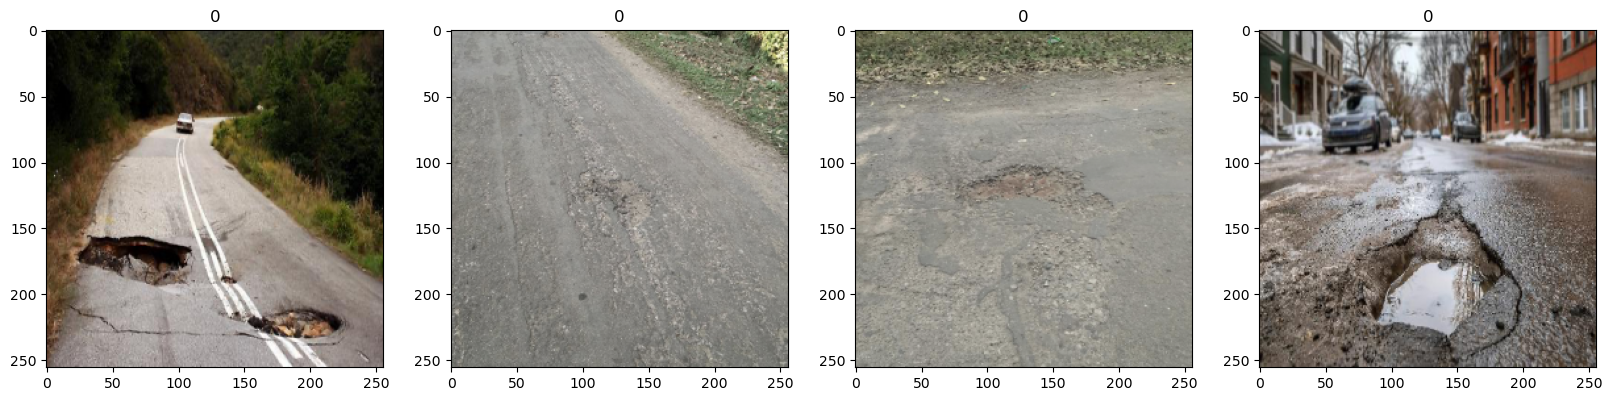

In [10]:
data=tf.keras.utils.image_dataset_from_directory(r"C:\potholess")

data.batch(batch_size=16)
data_iterator=data.as_numpy_iterator()
print(data)

batch=data_iterator.next()
len(batch[0])

batch[0].shape

batch[0].max()

fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

scaled= batch[0]/255

scaled.max()

data=data.map(lambda x,y: (x/255 , y))

batch[0]

data.as_numpy_iterator().next()[0].max()

batch[0]

train_size=int(len(data)*.7)
val_size=int(len(data)*.2)+1
test_size=int(len(data)*.1)+1

len(data)

train_size

val_size

test_size

train_size+test_size+val_size

train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size+2)

len(train)

len(test)

len(val)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 flatten (Flatten)           (None, 57600)             0

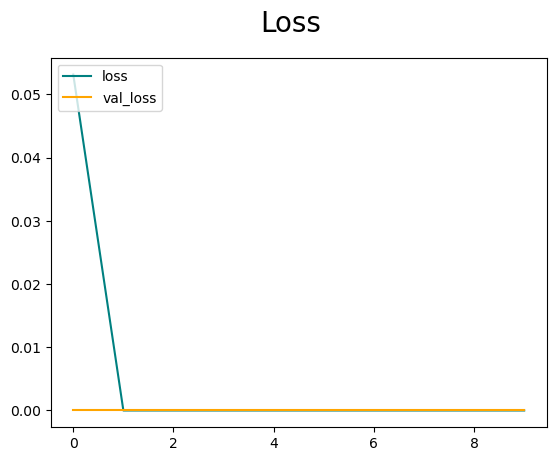

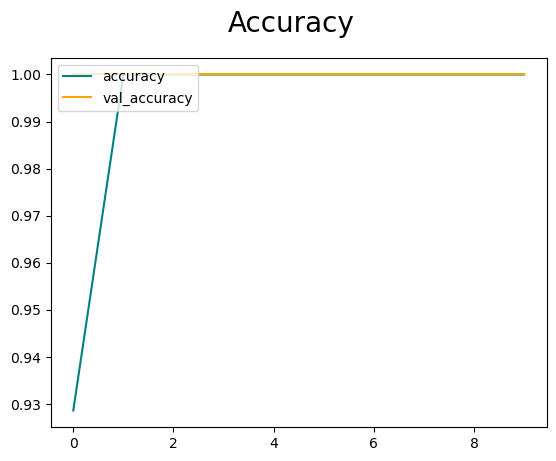

1/1 [==============================] - 0s 349ms/step


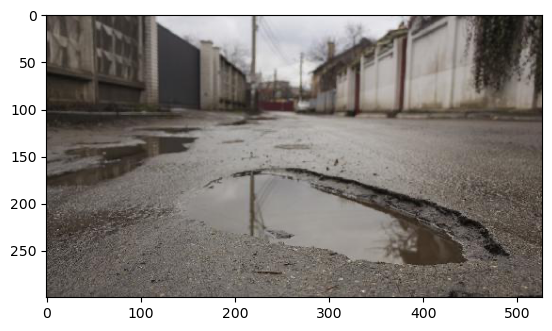

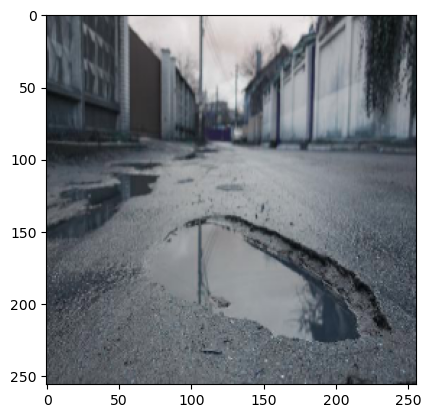

1/1 [==============================] - 0s 62ms/step
First image Pot hole present


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D,Conv2D,Dense,Flatten,Dropout

model=Sequential()

model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3),1,activation='relu'))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
#need to customise layers

model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

model.summary()

dataset = tf.data.Dataset.from_tensor_slices((
    tf.random.normal((3, 256, 256, 3)),
    tf.constant([1, 2, 3])
))

# Print the element_spec
print(dataset.element_spec)

# Iterate over the dataset and print the elements
for element in dataset:
    input_data, label = element
    print("Input data shape:", input_data.shape)
    print("Label:", label)
    print()

logdir='logs'

tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

hist=model.fit(train,epochs=10,validation_data=val,callbacks=[tensorboard_callback])

hist.history

fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre=Precision()
re=Recall()
acc=BinaryAccuracy()

for batch in test.as_numpy_iterator():
    X,y=batch
    yhat=model.predict(X)
    y = np.squeeze(y)
    yhat = np.squeeze(yhat)

    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

len(test)

pre.result().numpy()

re.result().numpy()

acc.result().numpy()

pre.result()

##testing data
import matplotlib.pyplot as plt



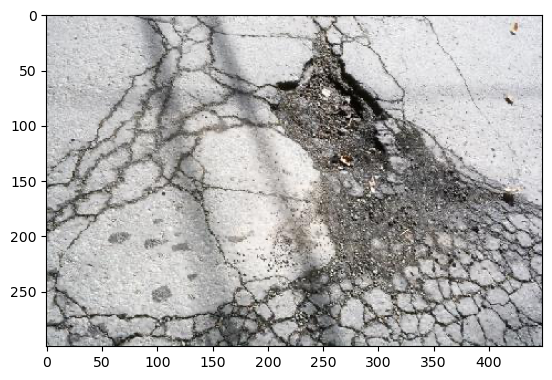

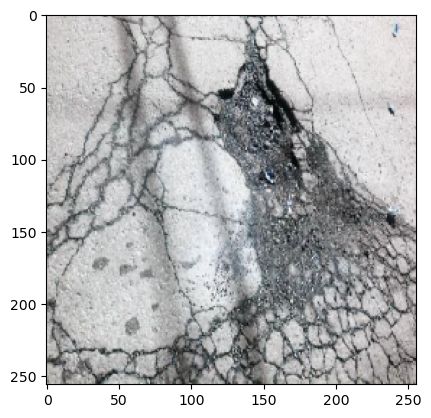

1/1 [==============================] - 0s 75ms/step
First image Pot hole present


In [28]:
img1=cv2.imread(r"C:\potholess\images\potholes16.png")
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
img1=img1.astype(float)
plt.show()

# img2=cv2.imread(r"C:\Users\Dell\Downloads\sih1person.jpeg")
# plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
# img2=img2.astype(float)
# plt.show()

resize1=tf.image.resize(img1,(256,256))
plt.imshow(resize1.numpy().astype(int))
plt.show()

# resize2=tf.image.resize(img2,(256,256))
# plt.imshow(resize2.numpy().astype(int))
# plt.show()

np.expand_dims(resize1,0)

# np.expand_dims(resize2,0)

def crowdddd(cr):
    if cr<0.2:
        return 'Pot hole present'
    

yhat1=model.predict(np.expand_dims(resize1/255,0))

yhat1

# yhat2=model.predict(np.expand_dims(resize2/255,0))

# yhat2

print('First image', crowdddd(yhat1))
# print('Second image', crowdddd(yhat2))